# Libraries

In [1]:
import os

In [2]:
cwd = os.getcwd()
cwd

'/Users/dibyendumandal/Google Drive/DIBYENDU/JOB_DataIncubator/Project_Indian_Middle_eastern_and_French'

In [3]:
os.listdir(cwd)

['.DS_Store',
 '.ipynb_checkpoints',
 'French_ingredients.txt',
 'French_ingredients_final.txt',
 'French_ingredients_inspected.txt',
 'French_recipes_details.csv',
 'French_recipes_details.txt',
 'French_recipes_urls.txt',
 'Indian_ingredients.txt',
 'Indian_ingredients_inspected.txt',
 'Indian_recipes_details.csv',
 'Indian_recipes_urls.txt',
 'ME_ingredients.txt',
 'ME_recipes_details.csv',
 'ME_recipes_urls.txt',
 'workspace_large.ipynb',
 'workspace_small_French-Copy1.ipynb',
 'workspace_small_French.ipynb',
 'workspace_small_Indian.ipynb',
 'workspace_small_joint.ipynb',
 'workspace_small_me.ipynb']

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet as wn 

## Gather

In [5]:
df_IN = pd.read_csv("Indian_recipes_details.csv")
df_ME = pd.read_csv("ME_recipes_details.csv")
df_FR = pd.read_csv("French_recipes_details.csv")

In [6]:
df_IN.sample()

,ingredients_string,name,url
710,1 1/2 cups plain low-fat yogurt 6 whole cloves...,One Pot Indian Chicken And Potatoes,https://www.allrecipes.com/recipe/266140/one-p...


In [8]:
df_ME.sample()

,ingredients,name,url,ingredients_proper,ingredients_string
357,"['1', '(14.5', 'ounce)', 'can', 'fava', 'beans...",Easy Fava Bean Salad,https://www.allrecipes.com/recipe/237553/easy-...,"['oil', 'onion', 'parsley', 'salt', 'tomato']","1 (14.5 ounce) can fava beans, drained and rin..."


In [9]:
df_FR.sample()

,ingredients_string,name,url
206,"4 bone-in chicken breast halves, with skin 2 t...",Dijon Chicken,https://www.allrecipes.com/recipe/17397/dijon-...


In [10]:
df_ME.drop(['ingredients', 'ingredients_proper'], axis=1, inplace=True)
df_ME.sample()

,name,url,ingredients_string
157,Sues Baba Ghanoush,https://www.allrecipes.com/recipe/109920/sues-...,1 large eggplant 2 tablespoons tahini 1/4 cup ...


In [11]:
df_IN['class'] = "Indian"

In [12]:
df_IN.sample()

,ingredients_string,name,url,class
83,"6 skinless, boneless chicken breast halves - c...",Easy Chicken Curry,https://www.allrecipes.com/recipe/15156/easy-c...,Indian


In [13]:
df_ME['class'] = "Middle_eastern"
df_ME.sample()

,name,url,ingredients_string,class
238,Mama Maries Moroccan Tuna Brik,https://www.allrecipes.com/recipe/214818/mama-...,"1 tablespoon butter 1 small onion, finely chop...",Middle_eastern


In [14]:
df_FR['class'] = "French"
df_FR.sample()

,ingredients_string,name,url,class
139,"1/2 pound new potatoes, quartered 1/4 cup chop...",Salad Nicoise,https://www.allrecipes.com/recipe/14239/salad-...,French


In [148]:
df = pd.concat([df_IN, df_ME, df_FR], ignore_index=True)
df.sample(10)

,class,ingredients_string,name,url
234,Indian,"3 tablespoons vegetable oil 1 medium onion, ch...",Four Seasons Chicken Curry,https://www.allrecipes.com/recipe/80662/four-s...
1558,French,9 ounces pitted prunes 1 cup all-purpose flour...,Far Breton,https://www.allrecipes.com/recipe/134592/far-b...
315,Indian,"1 large mango - peeled, seeded, and diced 3 ta...",Mango Mint Lassi With Indian Sweet Spices,https://www.allrecipes.com/recipe/183664/mango...
832,Middle_eastern,1 teaspoon ground cumin 1 teaspoon ground cori...,Middle Eastern Turkey Dogs,https://www.allrecipes.com/recipe/83104/middle...
1451,French,"1 cup mayonnaise 3 cloves garlic, minced and m...",Quick Garlic Aioli,https://www.allrecipes.com/recipe/233390/quick...
1437,French,14 medium red potatoes 1/4 cup olive oil 2 clo...,French Cafe Summer Salad,https://www.allrecipes.com/recipe/34579/french...
1685,French,Flatbread: 3 cups all-purpose flour 3 tablespo...,Flammkuchen Tarte Flambee,https://www.allrecipes.com/recipe/259111/flamm...
676,Indian,"1 tablespoon vegetable oil, or as needed 5 sha...",Mullingi White Radish Rasam,https://www.allrecipes.com/recipe/238136/mulli...
512,Indian,"1 (1 1/2 inch) piece fresh ginger root, choppe...",Awadi Dahi Murg Chicken In Yogurt Gravy,https://www.allrecipes.com/recipe/149570/awadi...
857,Middle_eastern,1 cup plain yogurt 1 teaspoon ginger garlic pa...,Pakistani Pot Roast Beef Fillets Pasanday,https://www.allrecipes.com/recipe/30936/pakist...


In [149]:
df.head()

,class,ingredients_string,name,url
0,Indian,1 cup whole wheat flour 1 cup all-purpose flou...,Indian Chapati Bread,https://www.allrecipes.com/recipe/85469/indian...
1,Indian,2 tablespoons extra-virgin olive oil 1 extra-l...,Keema Aloo Ground Beef And Potatoes,https://www.allrecipes.com/recipe/231026/keema...
2,Indian,3/4 cup warm water 1 teaspoon salt 1 pinch whi...,Roti Canaiparatha Indian Pancake,https://www.allrecipes.com/recipe/247233/roti-...
3,Indian,1 cup dried black chickpeas (garbanzo beans) 1...,Black Chana With Potato,https://www.allrecipes.com/recipe/246179/black...
4,Indian,1 cup halved grape tomatoes 1 cup diced cucumb...,Tomato Cucumber Kachumbar,https://www.allrecipes.com/recipe/256599/tomat...


In [150]:
df.shape

(1710, 4)

In [40]:
ingredients_raw = []

f = open('ME_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

f = open('Indian_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

f = open('French_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

ingredients_raw = list(set(ingredients_raw))
len(ingredients_raw)

761

In [41]:
ingredients_raw.sort()

In [18]:
ingredients = []

f = open('Indian_ingredients_inspected.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

f = open('French_ingredients_final.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

f = open('ME_ingredients.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

len(ingredients)

784

In [42]:
f = open("ingredients_raw.txt", 'w')
for item in ingredients_raw:
    f.write(item + '\n')
    
f.close()

In [19]:
ingredients = list(set(ingredients))
len(ingredients)

544

In [23]:
ingredients.sort()

In [24]:
f = open("combined_ingredients.txt", 'w')
for item in ingredients:
    f.write(item + '\n')
    
f.close()

In [26]:
replace_dictionary = {"amchoor": "amchur",
                      "berries": "berry",
                      "chai": "tea",
                      "channa": "chana",
                      "cherries": "cherry",
                      "chile": "chili",
                      "cranberries": "cranberry",
                      "creme": "cream",
                      "daal": "lentil",
                      "dal": "lentil",
                      "dhania": "coriander",
                      "drumsticks": "chicken",
                      "elaichi": "cardamom",
                      "filet": "fillet",
                      "filets": "fillets",
                      "hen": "chicken",
                      "hens": "chicken",
                      "jeera": "cumin",
                      "lavang": "clove",
                      "maida": "flour",
                      "mangos": "mango",
                      "mangoes": "mango",
                      "masoor": "lentil",
                      "matar": "pea",
                      "methi": "fenugreek",
                      "molasses": "molass",
                      "moong": "lentil",
                      "peaches": "peach",
                      "potatoes": "potato",
                      "potatoe": 'potato',
                      "radishe": "radish",
                      "radishes": "radish",
                      "rajma": "bean",
                      "roma": "tomato",
                      "sago": 'tapioca',
                      "suji": "semolina",
                      "strawberries": "strawberry",
                      "tomatoe": "tomato",
                      "tomatoes": "tomato"
                     }

In [35]:
ingredients = [replace_dictionary.get(item, item) for item in ingredients]
ingredients = list(set(ingredients))
ingredients.sort()
len(ingredients)

541

In [34]:
plurals_s = []

f = open('plurals_s.txt')
for word in f:
    plurals_s.append(word.rstrip())
    
f.close()
len(plurals_s)

115

In [43]:
ingredients = [item[:-1] if item in plurals_s else item for item in ingredients]
len(ingredients)

541

In [76]:
ingredients.remove('half-and-half')
len(ingredients)

540

In [97]:
def transformer(text):  
    
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    items = [word for word, pos in tags 
             if (pos == 'NN' 
                 or pos == 'NNP' 
                 or pos == 'NNS' 
                 or pos == 'NNPS')]
    
    items = [item[:-1] if item[-1]==',' else item for item in items]
    items = [replace_dictionary.get(item, item) for item in items]
    items = [item[:-1] if item in plurals_s else item for item in items]
    items = [item for item in items if item in ingredients]
    items_text = ' '.join(items)

    return items_text
    

In [98]:
transformer("Does it have any ingredient in it? What about potato cumin and coriander")

'potato cumin coriander'

In [151]:
df['ingredients_proper'] = \
df['ingredients_string'].apply(transformer)
df['ingredients_proper'].head()

0                                      wheat flour oil
1    oil onion beef clove ginger root serrano chili...
2                                sugar butter ghee egg
3    chickpea bean salt soda onion clove garlic gin...
4                grape onion cilantro lemon juice mint
Name: ingredients_proper, dtype: object

In [152]:
df.head()

,class,ingredients_string,name,url,ingredients_proper
0,Indian,1 cup whole wheat flour 1 cup all-purpose flou...,Indian Chapati Bread,https://www.allrecipes.com/recipe/85469/indian...,wheat flour oil
1,Indian,2 tablespoons extra-virgin olive oil 1 extra-l...,Keema Aloo Ground Beef And Potatoes,https://www.allrecipes.com/recipe/231026/keema...,oil onion beef clove ginger root serrano chili...
2,Indian,3/4 cup warm water 1 teaspoon salt 1 pinch whi...,Roti Canaiparatha Indian Pancake,https://www.allrecipes.com/recipe/247233/roti-...,sugar butter ghee egg
3,Indian,1 cup dried black chickpeas (garbanzo beans) 1...,Black Chana With Potato,https://www.allrecipes.com/recipe/246179/black...,chickpea bean salt soda onion clove garlic gin...
4,Indian,1 cup halved grape tomatoes 1 cup diced cucumb...,Tomato Cucumber Kachumbar,https://www.allrecipes.com/recipe/256599/tomat...,grape onion cilantro lemon juice mint


In [153]:
np.random.seed(0)

In [154]:
df.to_csv('recipe_data.csv', index=False, encoding='utf-8')

In [155]:
df.shape

(1710, 5)

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
vec = TfidfVectorizer()

In [158]:
X = vec.fit_transform(df['ingredients_proper'])
X

<1710x453 sparse matrix of type '<class 'numpy.float64'>'
	with 13755 stored elements in Compressed Sparse Row format>

In [159]:
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [160]:
X.sample()

,ajwain,allspice,almond,amchur,anise,apple,apricot,arbol,armagnac,artichoke,...,wonton,worcestershire,yam,yeas,yogurt,yolk,yukon,za,zest,zucchini
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
df.iloc[928]

class                                                    Middle_eastern
ingredients_string    1 red bell pepper, cut into thin strips 3 toma...
name                                              Moroccan Shabbat Fish
url                   https://www.allrecipes.com/recipe/213243/moroc...
ingredients_proper    pepper tilapia fillet chicken cayenne pepper s...
Name: 928, dtype: object

In [162]:
df = pd.concat([df, X], axis=1)
df.sample()

,class,ingredients_string,name,url,ingredients_proper,ajwain,allspice,almond,amchur,anise,...,wonton,worcestershire,yam,yeas,yogurt,yolk,yukon,za,zest,zucchini
928,Middle_eastern,"1 red bell pepper, cut into thin strips 3 toma...",Moroccan Shabbat Fish,https://www.allrecipes.com/recipe/213243/moroc...,pepper tilapia fillet chicken cayenne pepper s...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
X = df.iloc[:, 5:].values

In [133]:
def class_values(text):
    if text == 'Indian': return 0
    if text == 'Middle_eastern': return 1
    if text == 'French': return 2
    

In [137]:
class_values('French')

2

In [164]:
y = df['class'].apply(class_values)

In [170]:
from sklearn.cross_validation import train_test_split

In [171]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### PCA

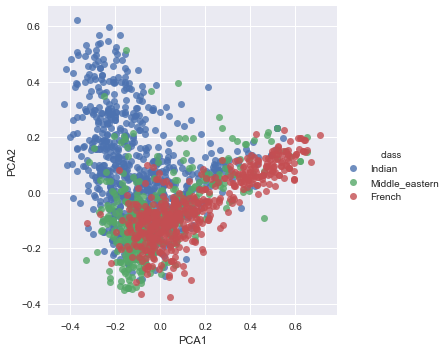

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X2D = pca.transform(X)

df['PCA1'] = X2D[:, 0]
df['PCA2'] = X2D[:, 1]
df['class_num'] = y

sns.lmplot('PCA1', 'PCA2', data=df, hue='class', fit_reg=False)

In [208]:
pca = PCA(n_components=5)
pca.fit(X)
X5D = pca.transform(X)

df['PCA1'] = X5D[:, 0]
df['PCA2'] = X5D[:, 1]
df['PCA3'] = X5D[:, 2]
df['PCA4'] = X5D[:, 3]
df['PCA5'] = X5D[:, 4]

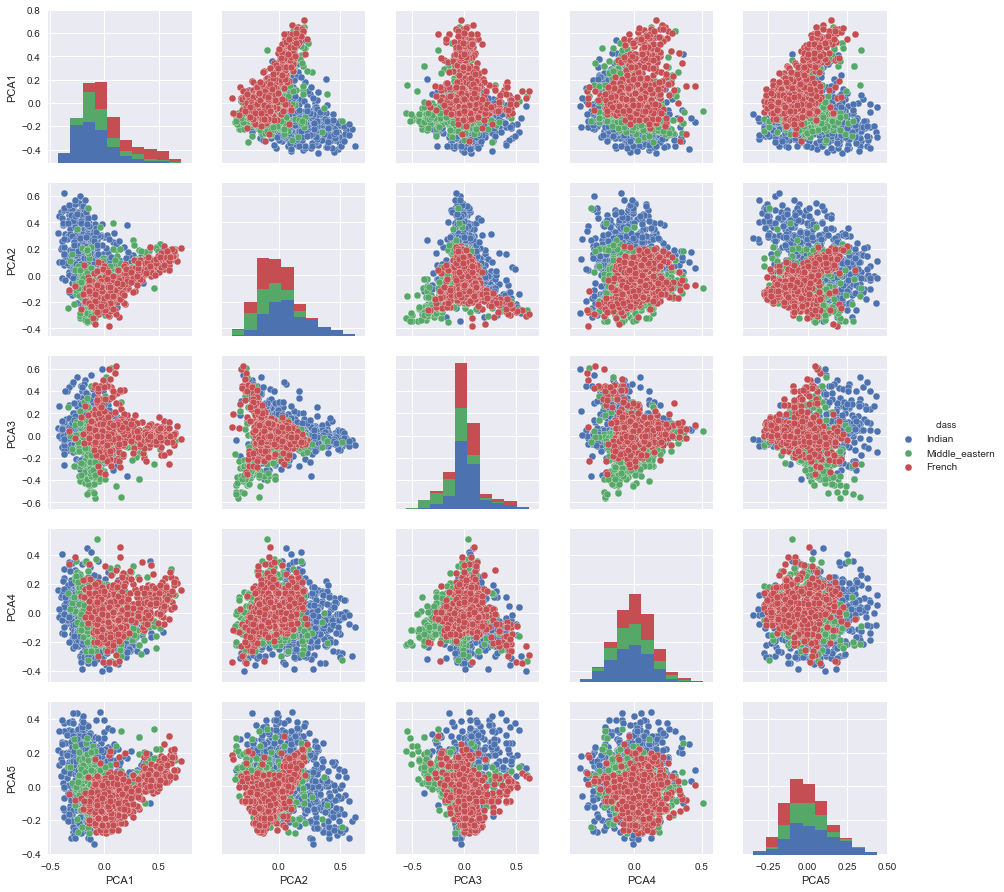

In [219]:
df_for_pp = df[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'class']]
sns.pairplot(df_for_pp, hue='class');

### Isomap

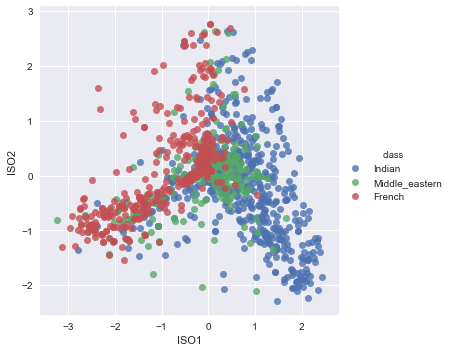

In [220]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
X2D = iso.transform(X)

df['ISO1'] = X2D[:, 0]
df['ISO2'] = X2D[:, 1]
df['class_num'] = y

sns.lmplot('ISO1', 'ISO2', data=df, hue='class', fit_reg=False)

### Gaussian Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
ypred = nb.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.5420560747663551

### Multinomial Naive Bayes

In [183]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
ypred = mnb.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.7850467289719626

Text(92.68,0.5,'Predicted class')

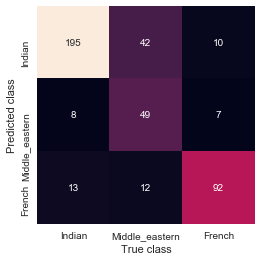

In [185]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class')

### Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.794392523364486

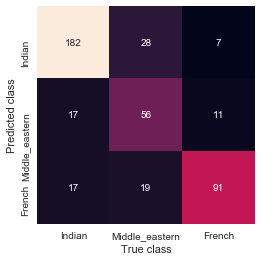

In [265]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class');

### Decision trees and random forests

In [253]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(Xtrain, ytrain)

In [254]:
ypred = tree.predict(Xtest)
accuracy_score(ytest, ypred)

0.7009345794392523

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(Xtrain, ytrain)
ypred = bag.predict(Xtest)
accuracy_score(ytest, ypred)

0.7686915887850467

Text(92.68,0.5,'Predicted class')

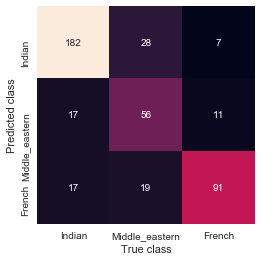

In [264]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class')

## Grid search

In [248]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.10, 1.0, 10., 100.],
              'fit_intercept': [False, True],
              'max_iter': [50, 100, 200]}

gs = GridSearchCV(estimator=LogisticRegression(),
                 param_grid = param_grid,
                 scoring='accuracy',
                 cv=5)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [False, True], 'max_iter': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [249]:
gs.best_params_

{'C': 1.0, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}

In [250]:
gs.best_score_

0.7847113884555382

In [251]:
clf = gs.best_estimator_

In [252]:
clf.score(Xtest, ytest)

0.794392523364486

### I. Get all URLs, store them in a list

#### Number and format

In [3]:
NUM_PAGES_FRANCE = 25
base_url_France = "https://www.allrecipes.com/recipes/721/" + \
                 "world-cuisine/european/french/?page="


#### Libraries

In [4]:
import requests
import bs4

#### Function to get the urls from a page

In [5]:
def recipe_urls_in_a_page(url):
    """Given an webpage url returns a list of 
    recipe urls in the webpage
    (CAUTION: Applies to allrecipes.com only)"""
    
    res = requests.get(url)
    res.raise_for_status()
    
    soup = bs4.BeautifulSoup(res.text, "lxml")
    elems = soup.find_all('article', class_ = "fixed-recipe-card")
    recipe_urls = [elem.find_all('a')[0].get('href') for elem in elems]
    
    return recipe_urls

#### Test!

In [6]:
recipe_urls_in_a_page(base_url_France+"1")

['https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/',
 'https://www.allrecipes.com/recipe/223506/poulet-de-provencal/',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/',
 'https://www.allrecipes.com/recipe/190997/traditional-layered-french-croissants/',
 'https://www.allrecipes.com/recipe/83905/calis-sinful-creme-brulee/',
 'https://www.allrecipes.com/recipe/16905/beef-bourguignon-ii/',
 'https://www.allrecipes.com/recipe/222387/chef-johns-creme-fraiche/',
 'https://www.allrecipes.com/recipe/16386/french-onion-soup-v/',
 'https://www.allrecipes.com/recipe/239230/chef-johns-coq-au-vin/',
 'https://www.allrecipes.com/recipe/8669/chicken-cordon-bleu-ii/',
 'https://www.allrecipes.com/recipe/15925/creamy-au-gratin-potatoes/',
 'https://www.allrecipes.com/recipe/16383/basic-crepes/',
 'https://www.allrecipes.com/recipe/8495/chicken-cordon-bleu-i/',
 'https://www.allrecipes.com/recipe/7028/french-baguettes/',
 'https://www.allrecipes.com/recipe/91192

#### Get the Urls!

In [7]:
from time import sleep

In [10]:
recipe_urls_French = []

for page_num in range(1, NUM_PAGES_FRANCE + 1):

    print('Souping page number', page_num, ', ', 
          len(recipe_urls_French), ' found so far')
    url = base_url_France + str(page_num)
    recipe_urls_French.extend(recipe_urls_in_a_page(url))
    sleep(10)
    

Souping page number 1 ,  0  found so far
Souping page number 2 ,  27  found so far
Souping page number 3 ,  47  found so far
Souping page number 4 ,  67  found so far
Souping page number 5 ,  87  found so far
Souping page number 6 ,  107  found so far
Souping page number 7 ,  127  found so far
Souping page number 8 ,  147  found so far
Souping page number 9 ,  167  found so far
Souping page number 10 ,  187  found so far
Souping page number 11 ,  207  found so far
Souping page number 12 ,  227  found so far
Souping page number 13 ,  247  found so far
Souping page number 14 ,  267  found so far
Souping page number 15 ,  287  found so far
Souping page number 16 ,  307  found so far
Souping page number 17 ,  327  found so far
Souping page number 18 ,  347  found so far
Souping page number 19 ,  367  found so far
Souping page number 20 ,  387  found so far
Souping page number 21 ,  407  found so far
Souping page number 22 ,  427  found so far
Souping page number 23 ,  447  found so far
Sou

#### Write URLs

In [11]:
f = open('French_recipes_urls.txt', 'w')
for url in recipe_urls_French:
    f.write(url+'\n')
f.close()

#### Read URLs

In [12]:
f = open('French_recipes_urls.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i>9: break
f.close()

https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/
https://www.allrecipes.com/recipe/223506/poulet-de-provencal/
https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/
https://www.allrecipes.com/recipe/190997/traditional-layered-french-croissants/
https://www.allrecipes.com/recipe/83905/calis-sinful-creme-brulee/
https://www.allrecipes.com/recipe/16905/beef-bourguignon-ii/
https://www.allrecipes.com/recipe/222387/chef-johns-creme-fraiche/
https://www.allrecipes.com/recipe/16386/french-onion-soup-v/
https://www.allrecipes.com/recipe/239230/chef-johns-coq-au-vin/
https://www.allrecipes.com/recipe/8669/chicken-cordon-bleu-ii/
https://www.allrecipes.com/recipe/15925/creamy-au-gratin-potatoes/


### II. For each URL, get
1. name
2. ingredients
3. url

Create a dictionary

III. Save the dictionaries in a list ###

#### Function for the details from a given URL

In [22]:
def recipe_details(url):
    """Given a url of a recipe returns a list of ingredients
    (CAUTION: Applies to allrecipes.com only)"""    

    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")

    name = ' '.join(url.split('/')[-2].split('-')).title()
    ingredients = []
    lines = soup.find_all('li', class_= "checkList__line")[:-4]
    for line in lines:
        item = line.find('label').get('title').split(" ")
        ingredients.extend(item)
        
    ingredients_string = " ".join(ingredients)
                          
    return {
        "name": name,
        "ingredients_string": ingredients_string,
        "url": url}

#### Load the list of URLs

In [14]:
recipes = []
f = open('French_recipes_urls.txt')
for line in f:
    recipes+= [line.rstrip()]
    
recipes[:3]

['https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/',
 'https://www.allrecipes.com/recipe/223506/poulet-de-provencal/',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/']

In [18]:
len(recipes)

507

In [15]:
import timeit

In [16]:
import datetime

In [17]:
print("Time: {}".format(datetime.datetime.now()))

Time: 2018-08-06 14:00:46.466253


### Downloads details from all the urls

In [30]:
recipes_in_detail = []
f = open('French_recipes_details.txt', 'w')

for i, url in enumerate(recipes):
    
    # if i > 2: break
    
    if i%10 == 0:
        print('Time = {}, souping page {}'.format(datetime.datetime.now(), i))
    
    recipe = recipe_details(url)
    sleep(5)
    
    recipes_in_detail += [recipe]
    f.write(recipe["name"])
    f.write("\t" + recipe["ingredients_string"])
    f.write("\t" + recipe["url"] + "\n")
    
f.close()
# recipes_in_detail

Time = 2018-08-06 14:18:21.478563, souping page 0
Time = 2018-08-06 14:19:15.207421, souping page 10
Time = 2018-08-06 14:20:08.812994, souping page 20
Time = 2018-08-06 14:21:02.176635, souping page 30
Time = 2018-08-06 14:21:55.201867, souping page 40
Time = 2018-08-06 14:22:48.129121, souping page 50
Time = 2018-08-06 14:23:41.411881, souping page 60
Time = 2018-08-06 14:24:34.674189, souping page 70
Time = 2018-08-06 14:25:28.041443, souping page 80
Time = 2018-08-06 14:26:22.019374, souping page 90
Time = 2018-08-06 14:27:15.025444, souping page 100
Time = 2018-08-06 14:28:08.021334, souping page 110
Time = 2018-08-06 14:29:01.742550, souping page 120
Time = 2018-08-06 14:29:54.924470, souping page 130
Time = 2018-08-06 14:30:48.044598, souping page 140
Time = 2018-08-06 14:31:41.084725, souping page 150
Time = 2018-08-06 14:32:34.144112, souping page 160
Time = 2018-08-06 14:33:27.238235, souping page 170
Time = 2018-08-06 14:34:20.362167, souping page 180
Time = 2018-08-06 14:35

In [32]:
f = open('French_recipes_details.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i > 3: break
    
f.close()

Cordon Bleu Chicken Rolls	8 skinless, boneless chicken breasts 8 slices cooked ham 4 slices Swiss cheese, cut into 1 inch pieces salt and pepper to taste 1 teaspoon dried thyme 1/4 cup melted butter 1/2 cup cornflakes cereal crumbs 1 (10.75 ounce) can condensed cream of chicken soup 1/2 cup sour cream	https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/
Poulet De Provencal	2 teaspoons olive oil 1 teaspoon butter 2 1/2 tablespoons balsamic vinegar 2 teaspoons Dijon mustard 3 large cloves garlic, chopped 4 (4 ounce) skinless, boneless chicken breast halves, pounded flat 1/3 cup chicken stock 1 large shallot, chopped 2 cups cremini mushrooms, chopped 1/3 cup chicken stock 1/4 teaspoon herbes de Provence, crumbled 1 1/2 teaspoons balsamic vinegar salt and ground black pepper to taste	https://www.allrecipes.com/recipe/223506/poulet-de-provencal/
Gratin Dauphinois De Solange	1 clove garlic, halved 2 pounds potatoes, peeled and thinly sliced 2 1/2 cups heavy whipping cream 2 1/4

In [29]:
line.rstrip().split("\t")

['Gratin Dauphinois De Solange',
 '1 clove garlic, halved 2 pounds potatoes, peeled and thinly sliced 2 1/2 cups heavy whipping cream 2 1/4 cups freshly grated Comte cheese',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/']

In [33]:
df_recipes_in_detail = pd.DataFrame(recipes_in_detail)

In [34]:
df_recipes_in_detail.sample()

,ingredients_string,name,url
119,4 eggs 1 teaspoon ground cinnamon 1 teaspoon g...,Uncle Jesses French Toast,https://www.allrecipes.com/recipe/84454/uncle-...


In [35]:
df_recipes_in_detail.to_csv('French_recipes_details.csv', index=False)

In [36]:
df = pd.read_csv('French_recipes_details.csv')

In [37]:
df.sample()

,ingredients_string,name,url
55,1 recipe pastry for a 9 inch single crust pie ...,Quiche Lorraine Ii,https://www.allrecipes.com/recipe/18477/quiche...


In [82]:
# set of all ingredients
# including repetition
French_ingredients = []

for i, ingredients in enumerate(df['ingredients_string']):
    French_ingredients+=ingredients.lower().split(" ")
    # if i > 3: break
    
# Unique
French_ingredients = list(set(French_ingredients))
len(French_ingredients)


1258

In [83]:
# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(French_ingredients)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)

# ingredients should be nouns
nouns = [word for word, pos in tags 
         if (pos == 'NN' 
             or pos == 'NNP' 
             or pos == 'NNS' 
             or pos == 'NNPS')]

len(nouns)

702

In [84]:
nouns = list(set(nouns))
len(nouns)

559

In [85]:
nouns.sort()
nouns[:10]

['%',
 'allspice',
 'almond',
 'almonds',
 'anchovy',
 'anise',
 'apple',
 'apples',
 'apricots',
 'armagnac']

In [86]:
French_ingredients = nouns

In [87]:
f = open("French_ingredients.txt", 'w')
for item in French_ingredients:
    f.write(item + '\n')
    
f.close()

In [88]:
f = open("French_ingredients.txt")
for i, item in enumerate(f):
    print(item.rstrip())
    if i > 1: break
        
f.close()

%
allspice
almond


In [89]:
French_ingredients_inspected = []

In [90]:
f = open("French_ingredients_inspected.txt")
for item in f:
    French_ingredients_inspected.append(item.rstrip())
    
f.close()

In [91]:
len(French_ingredients_inspected)

401

In [97]:
replace_dictionary = {"chai": "tea",
                      "creme": "cream",
                      "filet": "fillet",
                      "filets": "fillets",
                     }

In [98]:
French_ingredients_inspected = [replace_dictionary.get(item, item) 
                                for item in French_ingredients_inspected]
len(French_ingredients_inspected)

401

In [103]:
ends_with_s = [item for item in French_ingredients_inspected if item.endswith('s')]
len(ends_with_s)

109

In [105]:
does_not_end_with_s = [item for item in French_ingredients_inspected 
                       if not item.endswith('s')]
len(does_not_end_with_s)

292

In [104]:
non_plurals = ['bass', 'beaujolais', 'boneless', 'jus', 'watercress']

plurals_special = {"berries": "berry",
                   "blackberries": "blackberry",
                   "blueberries": "blueberry",
                   "calves": "calf",
                   "cherries": "cherry",
                   "cranberries": "cranberry",
                   "leaves": "leaf",
                   "potatoes": "potato",
                   "radishes": "radish",
                   "strawberries": "strawberry",
                   "tomatoes": "tomato"
                   }

plurals_s = [word for word in ends_with_s if word not in non_plurals]
plurals_s = [word for word in plurals_s if word not in plurals_special]


In [109]:
French_ingredients_inspected = \
does_not_end_with_s \
+ non_plurals \
+ list(plurals_special.values()) \
+ [word[:-1] for word in plurals_s]

len(French_ingredients_inspected)

402

In [110]:
French_ingredients_inspected = list(set(French_ingredients_inspected))
len(French_ingredients_inspected)

364

In [112]:
French_ingredients_inspected.sort()
len(French_ingredients_inspected)

364

In [113]:
f = open('French_ingredients_final.txt', 'w')
for word in French_ingredients_inspected:
    f.write(word + '\n')
    
f.close()

In [123]:
French_ingredients_final = French_ingredients_inspected
len(French_ingredients_final)

364

In [119]:
ingredients = []

for i, item in enumerate(df['ingredients_string']):
    ingredients+=item.lower().split(" ")
    
len(ingredients)

20325

In [120]:
ingredients = [replace_dictionary.get(item, item) for item in ingredients]
len(ingredients)

20325

In [121]:
ingredients = [plurals_special.get(item, item) for item in ingredients]
len(ingredients)

20325

In [122]:
ingredients = [item[:-1] if item in plurals_s else item
               for item in ingredients]
len(ingredients)

20325

In [124]:
ingredients = [item for item in ingredients if item in French_ingredients_final]
len(ingredients)

4382

In [125]:
ingredients_series = pd.Series(ingredients)

In [126]:
counts = ingredients_series.value_counts()
counts[:5]

salt      308
sugar     207
pepper    203
egg       194
flour     189
dtype: int64

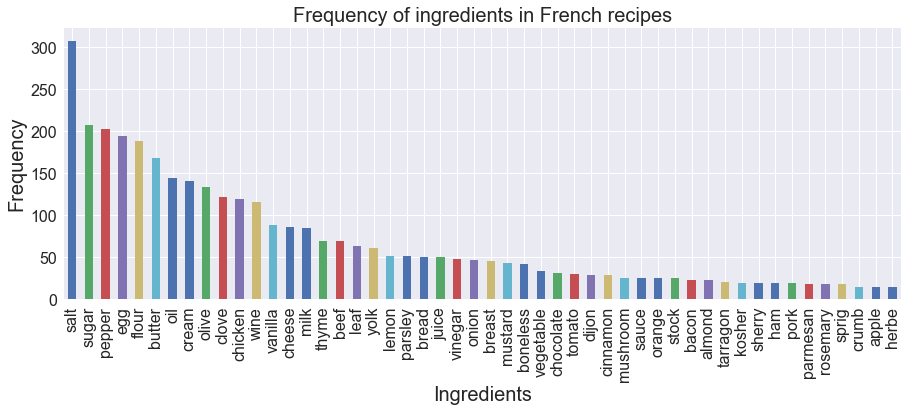

In [128]:
counts[:50].plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in French recipes', size=20);